In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ete3
import cassiopeia as cas

from collections import defaultdict
import itertools

import sys
import os
sys.path.insert(0, os.path.abspath('../scripts/'))
import utils

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.labelsize'] = 15

# Figure S5

In [13]:
def get_observed_potencies(tree):
    fitch_labeling = {}
    type_labeling = {}

    # the cell type labeling in the underlying simulation
    for node in tree.iter_descendants('postorder'):
        type_labeling[node] = node.name.split('_')[1]

    # the fitch labeling of potency
    for node in tree.iter_descendants('postorder'):
        if node.is_leaf():
            fitch_labeling[node] = set([type_labeling[node]])
        else:
            fitch_labeling[node] = set()
            for child in node.children:
                fitch_labeling[node] = fitch_labeling[node] | fitch_labeling[child]

    for node in fitch_labeling.keys():
        fitch_labeling[node] = frozenset(fitch_labeling[node])    

    return fitch_labeling

def get_observed_potencies2(tree_file, meta):

    tree = cas.data.CassiopeiaTree(tree = tree_file)
    
    utils.label_tree_with_leaf_states(tree, meta)
    
    potencies = {}
    for i in tree.internal_nodes:
        potencies[i] = frozenset([tree.get_attribute(l, "state_labels")[0] for l in tree.leaves_in_subtree(i)])

    return potencies


In [15]:
# fm_meta = pd.read_csv("../data/simulations/inputs/differentiation_maps/supplementary_data_1_fate_map_panel/fate_map_panel_metadata.csv")
# ex_meta = pd.read_csv("../data/simulations/inputs/trees/supplementary_data_3_simulated_experiments/experiment_metadata.csv")
# ex_to_fm_dict = dict(zip(ex_meta["Experiment id"], ex_meta["Fate map id"]))

# fixed_ex_meta = ex_meta[ex_meta["Sampling scheme"] == "fixed"]

# fm_to_ex_dict = defaultdict(list)
# for i in range(fixed_ex_meta.shape[0]):
#     fm_to_ex_dict[fixed_ex_meta["Fate map id"].iloc[i]].append(fixed_ex_meta["Experiment id"].iloc[i])

# fm_indices = [i for i in list(range(2, 12)) + list(range(17, 27))]
# states = ["type_-" + str(i) for i in range(1, 17)]

In [17]:
# rows = []

# for fm_ind in fm_indices:
#     fm_path = f"../data/simulations/inputs/differentiation_maps/supplementary_data_1_fate_map_panel/fate_map{fm_ind:04}.json"
#     gt_progens = [frozenset([j.split("_")[1] for j in i]) for i in utils.get_progens_qfm_json_format(fm_path)]

#     for ex in fm_to_ex_dict[fm_ind]:
#         tree = ete3.Tree(f"../data/simulations/inputs/trees/supplementary_data_3_simulated_experiments/simulated_phylogeny/{ex:04}.newick", format=1)
#         fitch_labelings = get_observed_potencies(tree)

#         counter = 0
#         denom = 0
#         for i in list(fitch_labelings.values()):
#             if len(i) > 1:
#                 denom += 1
#                 if i in gt_progens:
#                     counter += 1
#         rows.append([counter/denom, denom/1599, "QFM"])

# results = pd.DataFrame(rows, columns = ["proportion", "num_singleton", "source"])

In [18]:
# rows = []

# for fm_ind in fm_indices:
#     fm_path = f"../data/simulations/inputs/differentiation_maps/supplementary_data_1_fate_map_panel/fate_map{fm_ind:04}.json"
#     gt_progens = [frozenset([j.split("_")[1] for j in i]) for i in utils.get_progens_qfm_json_format(fm_path)]

    
#     for t in range(5):
#         tree_file = f"../data/simulations/inputs/trees/bin_tree/type_16/cells_100/{fm_ind:04}_tree_{t}.txt"
#         meta_file = f"../data/simulations/inputs/trees/bin_tree/type_16/cells_100/{fm_ind:04}_meta_{t}.txt"
#         meta = pd.read_csv(meta_file, sep = "\t")
#         potencies = get_observed_potencies2(tree_file, meta)

#         counter = 0
#         denom = 0
#         for i in list(potencies.values()):
#             if len(i) > 1:
#                 denom += 1
#                 if i in gt_progens:
#                     counter += 1
#         rows.append([counter/denom, denom/1599, "CARTA"])

# results2 = pd.DataFrame(rows, columns = ["proportion", "num_singleton", "source"])

In [19]:
df_plot = pd.concat([results, results2], axis = 0)

df_plot.to_csv("../data/simulations/results/cell_lineage_tree_stats.csv")

[]

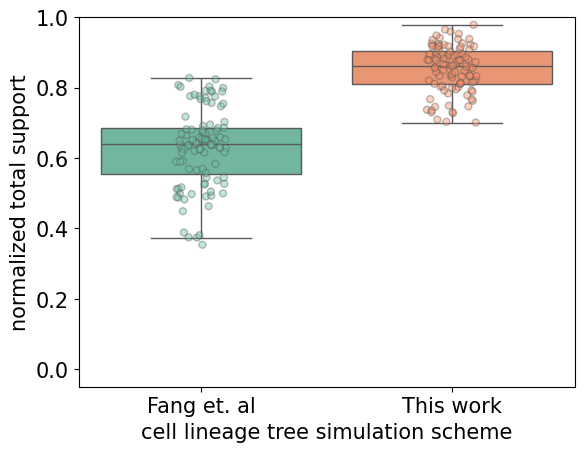

In [20]:
df_plot = pd.read_csv("../data/simulations/results/cell_lineage_tree_stats.csv")

sns.boxplot(x="source", y='proportion', hue="source", data=df_plot, showfliers = False, palette = "Set2")
sns.stripplot(data=df_plot, x="source", y='proportion', hue="source", alpha=.4, linewidth=1, jitter=.1, palette = "Set2")
plt.xlabel("cell lineage tree simulation scheme")
# ax[i,j].set_title(cell_num)
# ax[i,j].get_legend().remove()
plt.ylabel("normalized total support")
plt.ylim(-0.05, 1)
# plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (5,6)
plt.xticks([0, 1], ['Fang et. al', 'This work'])
plt.plot()

[]

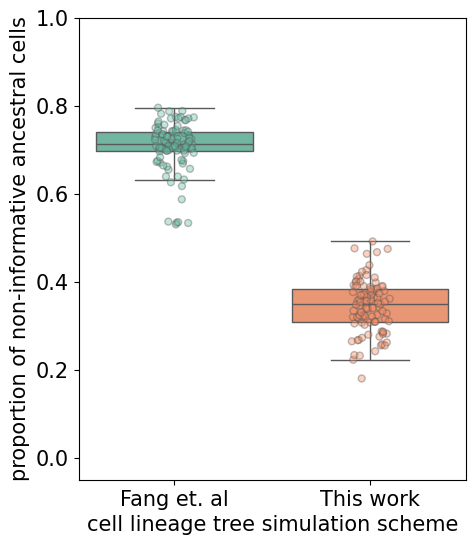

In [21]:
sns.boxplot(x="source", y='num_singleton', hue="source", data=df_plot, showfliers = False, palette = "Set2")
sns.stripplot(data=df_plot, x="source", y='num_singleton', hue="source", alpha=.4, linewidth=1, jitter=.1, palette = "Set2")

plt.xlabel("cell lineage tree simulation scheme")
# ax[i,j].set_title(cell_num)
# ax[i,j].get_legend().remove()
plt.ylabel("proportion of non-informative ancestral cells")
plt.ylim(-0.05, 1)
# plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (5,6)
plt.xticks([0, 1], ['Fang et. al', 'This work'])

plt.plot()

# Figure S6

In [22]:
# fm_meta = pd.read_csv("../data/simulations/inputs/differentiation_maps/supplementary_data_1_fate_map_panel/fate_map_panel_metadata.csv")
# ex_meta = pd.read_csv("../data/simulations/inputs/trees/supplementary_data_3_simulated_experiments/experiment_metadata.csv")
# ex_to_fm_dict = dict(zip(ex_meta["Experiment id"], ex_meta["Fate map id"]))
# fm_to_ex_dict = defaultdict(list)
# for i in range(ex_meta.shape[0]):
#     fm_to_ex_dict[ex_meta["Fate map id"][i]].append(ex_meta["Experiment id"][i])

In [23]:
# purples = sns.color_palette("ch:s=-.1,r=.6", n_colors = 6)

# method_color_dictionary = {'carta-tree': sns.color_palette()[0],
#                            'ground_truth_times': sns.color_palette()[4],
#                            'mixed_25site': purples[2],
#                            'mixed_50site': purples[3],
#                            'mixed_100site': purples[4]}

# fm_indices = range(2, 53)
# states = ["type_-" + str(i) for i in range(1, 17)]

In [24]:
# rows = []
# missing = []

# for fm_ind in fm_indices:
#     fm_path = f"../data/simulations/inputs/differentiation_maps/supplementary_data_1_fate_map_panel/fate_map{fm_ind:04}.json"
#     gt_progens = utils.get_progens_qfm_json_format(fm_path)

#     counter = 0
#     for ex in fm_to_ex_dict[fm_ind]:
#         res_progens = utils.get_progens_from_ilp_output(f"../data/simulations/results/qfm_tree/carta_tree/{ex:04}_progenitors_15.txt")
#         res_progens = list(k for k,_ in itertools.groupby(res_progens) if len(k) > 1)
            
#         dist = utils.jaccard_dist(gt_progens, res_progens, states)
#         sum_min_sd = utils.sum_of_min_symmetric_difference(gt_progens, res_progens)
#         precision, recall, fpr = utils.classification_scores(gt_progens, res_progens, states)

#         # if len(res_progens) != len(gt_progens):
#         #     print("oops")
#         #     print(dist)
#         rows.append([
#                                     fm_ind,
#                                     ex,
#                                     "carta-tree",
#                                     dist,
#                                     sum_min_sd,
#                                     precision,
#                                     recall,
#                                     fpr
#                                 ])

    
# results = pd.DataFrame(rows, columns = ["fate_ind",
#                                         "tree_ind",
#                                         "method", 
#                                         "jaccard_dist",
#                                        "sum_of_min_symmetric_diff",
#                                        "precision",
#                                        "recall",
#                                        "fpr"])

In [25]:
# rows = []

# for fm_ind in fm_indices:
#     fm_path = f"../data/simulations/inputs/differentiation_maps/supplementary_data_1_fate_map_panel/fate_map{fm_ind:04}.json"
#     gt_progens = utils.get_progens_qfm_json_format(fm_path)

#     counter = 0
#     for ex in fm_to_ex_dict[fm_ind]:

#         for type in ["ground_truth_times", "mixed_25site", "mixed_50site", "mixed_100site"]:
#             ice_fase_f = f"../data/simulations/results/qfm_tree/ICE-FASE/{type}/{ex:04}_IceFaseGraph.nwk"
#             res_progens = utils.get_progens_from_tree_input(ice_fase_f)
                
#             dist = utils.jaccard_dist(gt_progens, res_progens, states)
#             sum_min_sd = utils.sum_of_min_symmetric_difference(gt_progens, res_progens)
#             precision, recall, fpr = utils.classification_scores(gt_progens, res_progens, states)
        
#             rows.append([
#                                         fm_ind,
#                                         ex,
#                                         type,
#                                         dist,
#                                         sum_min_sd,
#                                         precision,
#                                         recall,
#                                         fpr
#                                     ])
    
# results_ice = pd.DataFrame(rows, columns = ["fate_ind",
#                                         "tree_ind",
#                                         "method", 
#                                         "jaccard_dist",
#                                        "sum_of_min_symmetric_diff",
#                                        "precision",
#                                        "recall",
#                                        "fpr"])

In [26]:
# df_results = pd.concat([results, results_ice])

# df_results.to_csv("../data/simulations/results/qfm_tree_results.csv")

In [27]:
df_results = pd.read_csv("../data/simulations/results/qfm_tree_results.csv")

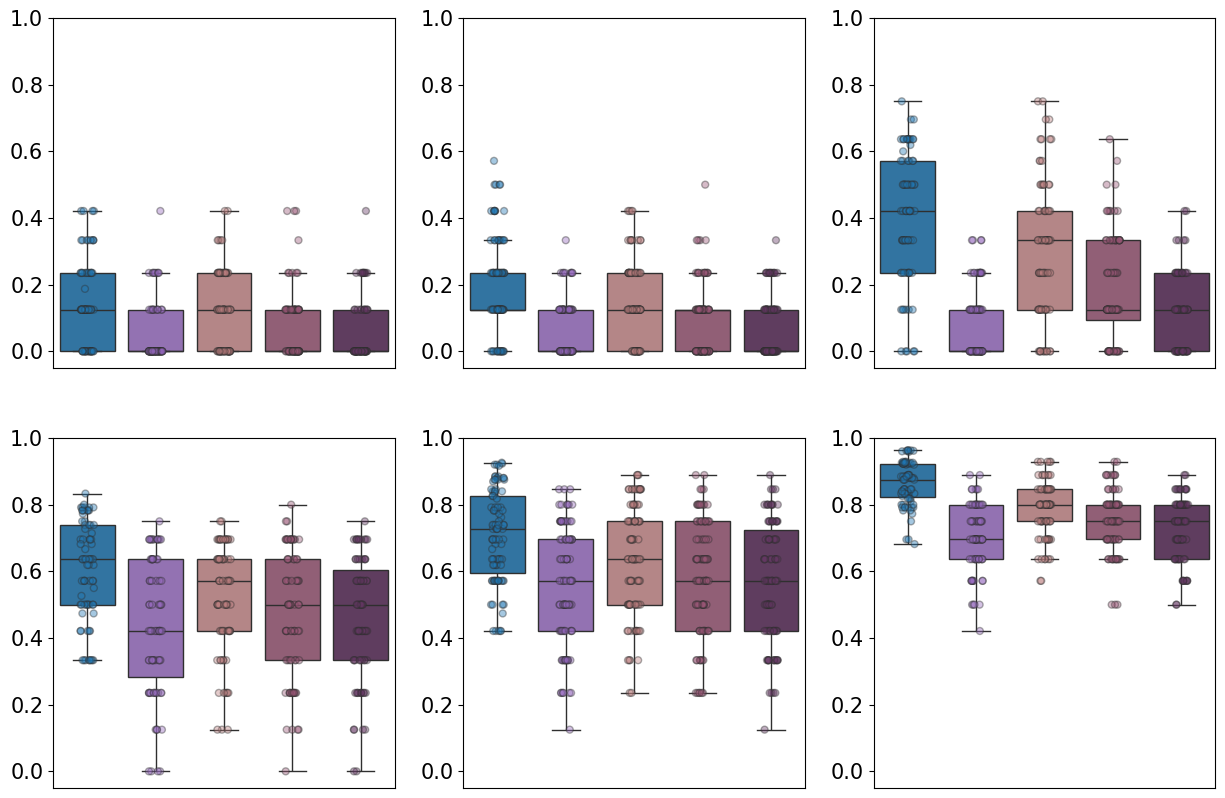

In [28]:
cell_type_16 = fm_meta[fm_meta["Number of terminal types"] == 16]
map_types = ["bal_tbr", "random", "pec_tbr"]
sample_types = ["fixed", "proportional"]

fig, ax = plt.subplots(2,3, figsize=(15, 10))

for i in range(2):
    for j in range(3):
        map_type = map_types[j]
        sample = sample_types[i]
        
        fm_indices = list(cell_type_16[cell_type_16["Topology category"] == map_type]["Fate map index"])
        ex_inds = list(ex_meta[(ex_meta["Fate map id"].isin(fm_indices)) & (ex_meta["Sampling scheme"] == sample)]["Experiment id"])
        df_plot = df_results[(df_results["tree_ind"].isin(ex_inds))]
    
        sns.boxplot(x="method", y='jaccard_dist', hue="method", data=df_plot, showfliers = False, ax=ax[i, j], palette= method_color_dictionary)
        sns.stripplot(data=df_plot, x="method", y="jaccard_dist", hue="method", alpha=.4, linewidth=1, jitter=.1, ax=ax[i, j], palette= method_color_dictionary)
        # ax[i,j].set_title(f"{map_type}, {sample}")
        # ax[i,j].get_legend().remove()
        ax[i,j].set_xlabel("")
        ax[i,j].set_ylabel("")
        ax[i,j].set(ylim=(-0.05, 1))
        ax[i, j].set_xticks([])

# plt.xticks(rotation=90)
# plt.plot()

# Figure S7 and S8 (runtimes)

In [36]:
# cell_types_list = ["graph/type_6", "graph/type_10", "graph/type_14", "poly_tree/type_8", "poly_tree/type_12", "poly_tree/type_16", "bin_tree/type_8", "bin_tree/type_12", "bin_tree/type_16"]
# num_cells_list = [50, 100, 200]
# fm_indices = [str(i).zfill(4) for i in list(range(2, 12)) + list(range(17, 27))]
# tree_index_list = list(range(5))
# cell_types_list_to_k = dict(zip(["graph/type_6", "graph/type_10", "graph/type_14", "bin_tree/type_8", "bin_tree/type_12", "bin_tree/type_16"], [5, 9, 13, 7, 11, 15]))
# methods = ["Carta-tree", "Carta-DAG", "ICE-FASE", "EvoC"]
# # cell_types_list_to_k = dict(zip(cell_types_list, [9]))

In [53]:
# vals = []

# for ct in cell_types_list:
#     for nc in num_cells_list:
#         for fm in fm_indices:
#             for t in tree_index_list:
#                 if "bin_tree" in ct:
#                     k = cell_types_list_to_k[ct]
#                     res = pd.read_csv(f"../data/simulations/results/carta_dag/{ct}/cells_{nc}/{fm}_{t}_results_{k}.txt", sep = "\t")
#                     time = res["model_runtime"][0] + res["model_buildtime"][0]
#                     vals.append([ct.split("/")[0], ct.split("type_")[1], nc, fm, t, k, time])
#                 elif "poly_tree" in ct:
#                     graph_dicts = []
#                     with open(f"../data/simulations/inputs/differentiation_maps/{ct}/graph_fate_map{fm}.txt") as g_file:
#                         for line in g_file:
#                             graph_dicts.append(json.loads(line))
            
#                     edge_dict = {}
#                     for key, value in graph_dicts[0].items():
#                         edge_dict[str(key)] = value
            
#                     k_center = len([i for i in edge_dict.values() if len(i) > 1])
#                     k_list = list(range(max(1, k_center - 3), k_center + 4))
#                     for k in k_list:
#                         res = pd.read_csv(f"../data/simulations/results/carta_tree/{ct}/cells_{nc}/{fm}_{t}_results_{k}.txt", sep = "\t")
#                         time = res["model_runtime"][0] + res["model_buildtime"][0]
#                         vals.append([ct.split("/")[0], ct.split("type_")[1], nc, fm, t, k, time])
#                 else:
#                     kc = cell_types_list_to_k[ct]
#                     for k in range(kc - 3, kc + 4):
#                         res = pd.read_csv(f"../data/simulations/results/carta_dag/{ct}/cells_{nc}/{fm}_{t}_results_{k}.txt", sep = "\t")
#                         time = res["model_runtime"][0] + res["model_buildtime"][0]
#                         vals.append([ct.split("/")[0], ct.split("type_")[1], nc, fm, t, k, time])

# val_df = pd.DataFrame(vals, columns = ["type", "# terminal", "# cells", "fm_ind", "t_ind", "k", "time"])

# val_df.to_csv("../data/simulations/results/runtimes.csv")

In [48]:
val_df = pd.read_csv("../data/simulations/results/runtimes.csv", index_col = 0)
val_df["# terminal"] = [str(i) for i in val_df["# terminal"]]

[]

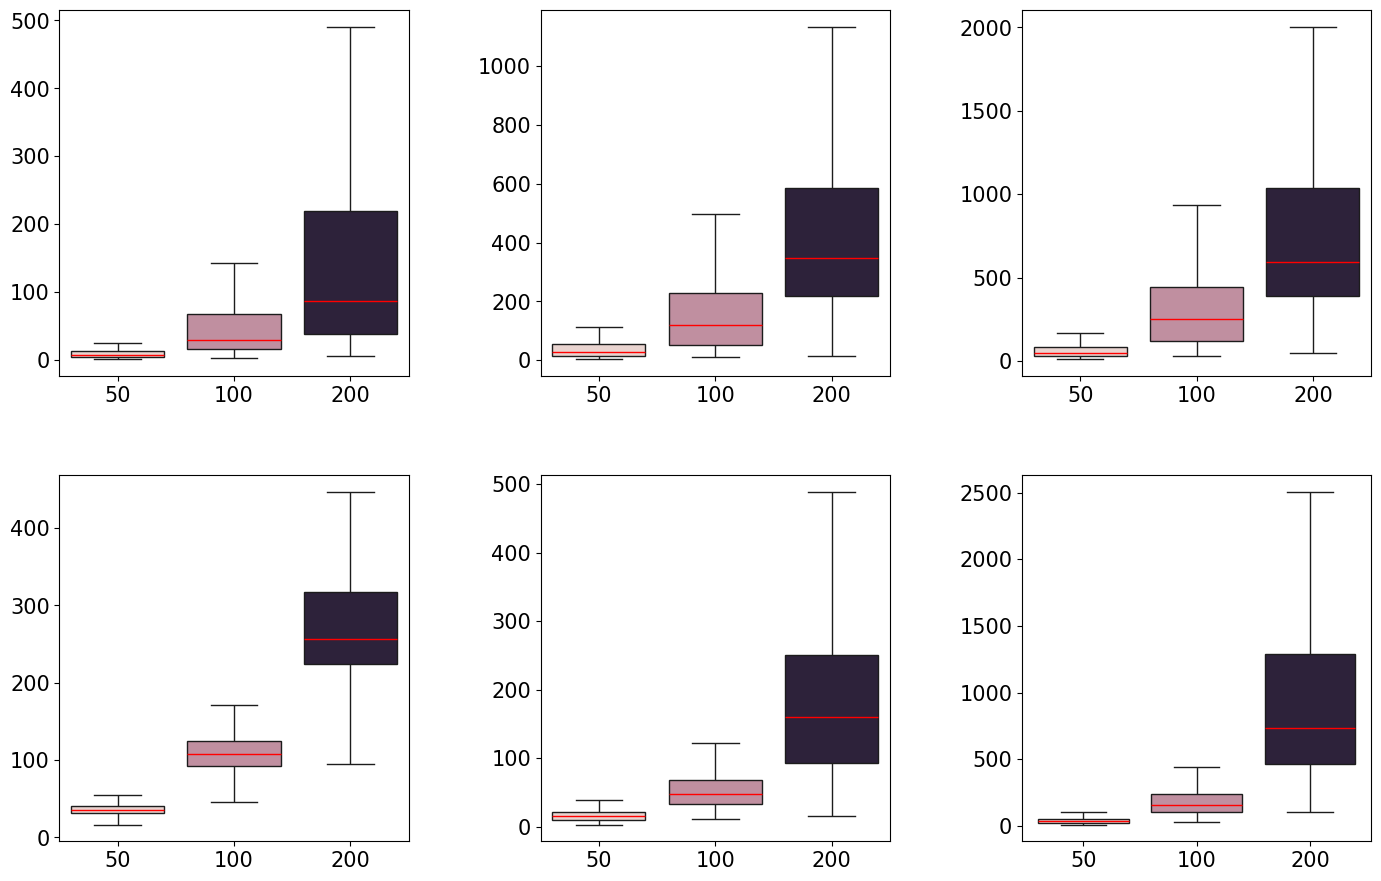

In [49]:
map_types = [["bin_tree", "poly_tree"], ["graph"]]
cell_nums = {"tree": [8, 12, 16], "graph": [6, 10, 14]}

fig, ax = plt.subplots(2,3, figsize=(15, 10))

for i in range(2):
    for j in range(3):
        map_type = map_types[i]
        if len(map_type) == 2:
            cell_nums = [8, 12, 16]
        else:
            cell_nums = [6, 10, 14]
        cell_num = cell_nums[j]

        df_plot = val_df[(val_df["type"].isin(map_type)) & (val_df["# terminal"] == str(cell_num))]
    
        sns.boxplot(x="# cells", y='time', hue = "# cells", data=df_plot, showfliers = False, ax=ax[i, j], medianprops={'color': 'red'})
        # sns.stripplot(data=df_plot, x="# cells", y="time", hue="k", alpha=.4, dodge=True, linewidth=1, jitter=.1, ax=ax[i, j])
        ax[i,j].set_title("")
        ax[i,j].set_xlabel("")
        ax[i,j].set_ylabel("")
        ax[i,j].get_legend().remove()
        # ax[i,j].legend(title="k")

# fig.legend(handles, labels, loc='upper right')
# plt.xticks(rotation=90)
fig.tight_layout(pad=5.0)
plt.plot()

/tmp/ipykernel_787017/1041276718.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["# terminal"] = [int(i) for i in df_plot["# terminal"]]
/tmp/ipykernel_787017/1041276718.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["# terminal"] = [int(i) for i in df_plot["# terminal"]]
/tmp/ipykernel_787017/1041276718.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

[]

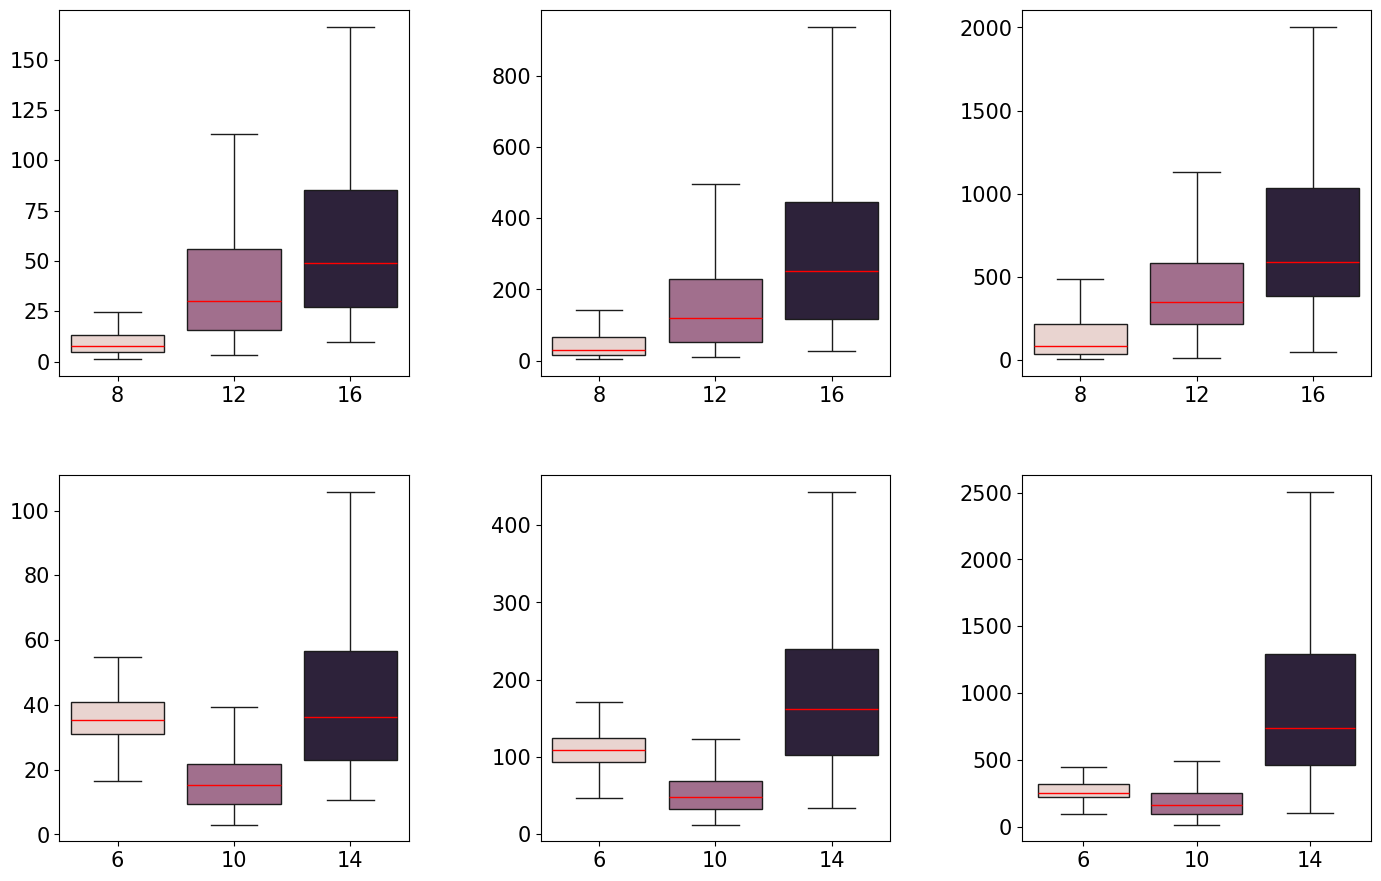

In [50]:
map_types = [["bin_tree", "poly_tree"], ["graph"]]
cell_nums = [50, 100, 200]

fig, ax = plt.subplots(2,3, figsize=(15, 10))

for i in range(2):
    for j in range(3):
        map_type = map_types[i]
        cell_num = cell_nums[j]

        df_plot = val_df[(val_df["type"].isin(map_type)) & (val_df["# cells"] == cell_num)]
        df_plot["# terminal"] = [int(i) for i in df_plot["# terminal"]]
    
        sns.boxplot(x="# terminal", y='time', hue="# terminal", data=df_plot, showfliers = False, ax=ax[i, j], medianprops={'color': 'red'})
        # sns.stripplot(data=df_plot, x="# terminal", y="time", hue="k", alpha=.4, linewidth=1, ax=ax[i, j])
        ax[i,j].set_title("")
        ax[i,j].set_xlabel("")
        ax[i,j].set_ylabel("")
        ax[i,j].get_legend().remove()
        # ax[i,j].legend(title="k")

# fig.legend(handles, labels, loc='upper right')
# plt.xticks(rotation=90)
fig.tight_layout(pad=5.0)
plt.plot()

[]

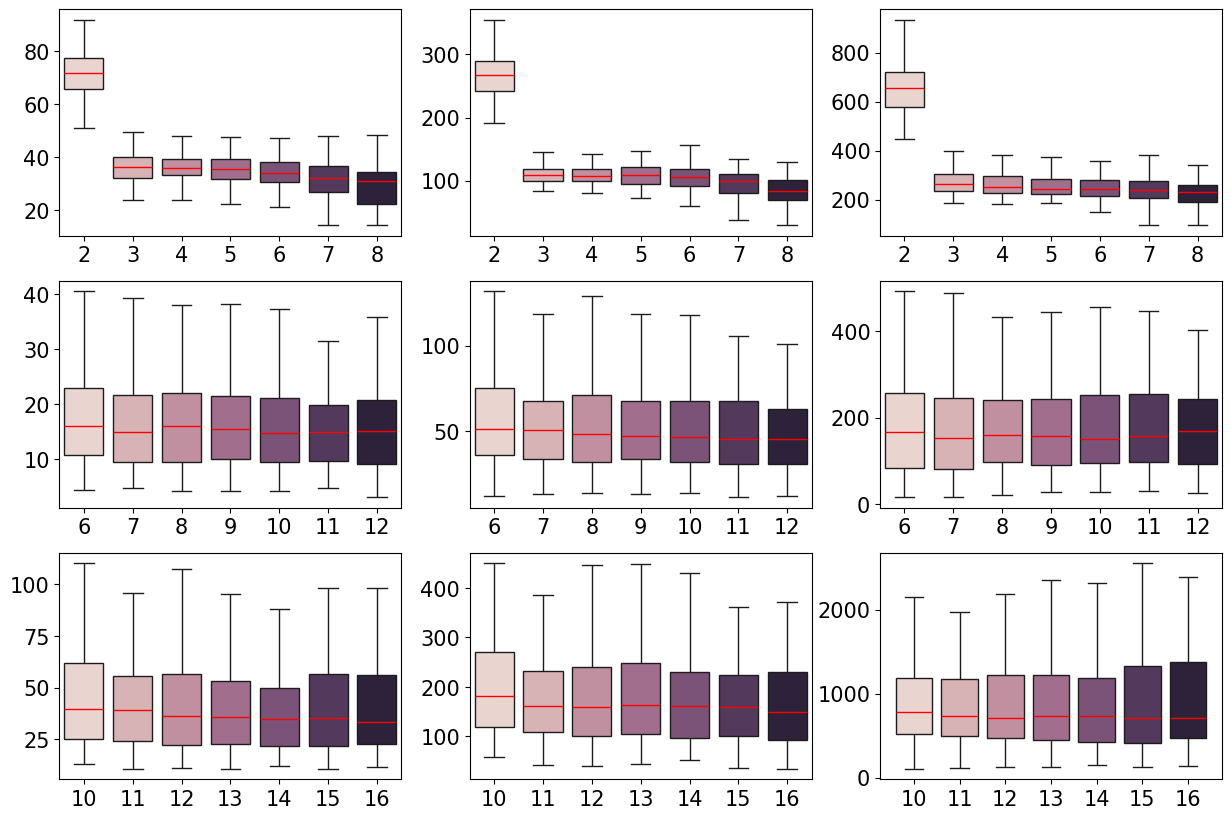

In [51]:
map_types = ["tree", "graph"]
cell_nums = [50, 100, 200]
term_nums = [6, 10, 14]

fig, ax = plt.subplots(3,3, figsize=(15, 10))

for i in range(3):
    for j in range(3):
        term_num = term_nums[i]
        cell_num = cell_nums[j]

        df_plot = val_df[(val_df["type"] == "graph") & (val_df["# cells"] == cell_num) & (val_df["# terminal"] == str(term_num))]
    
        sns.boxplot(x="k", y='time', hue="k", data=df_plot, showfliers = False, ax=ax[i, j], medianprops={'color': 'red'})
        # sns.stripplot(data=df_plot, x="# terminal", y="time", hue="k", alpha=.4, linewidth=1, ax=ax[i, j])
        # ax[i,j].set_title(f"{cell_num}/{term_num}")
        ax[i,j].set_xlabel("")
        ax[i,j].set_ylabel("")
        ax[i,j].get_legend().remove()
        # ax[i,j].legend(title="k")

# fig.legend(handles, labels, loc='upper right')
# plt.xticks(rotation=90)
plt.plot()

[]

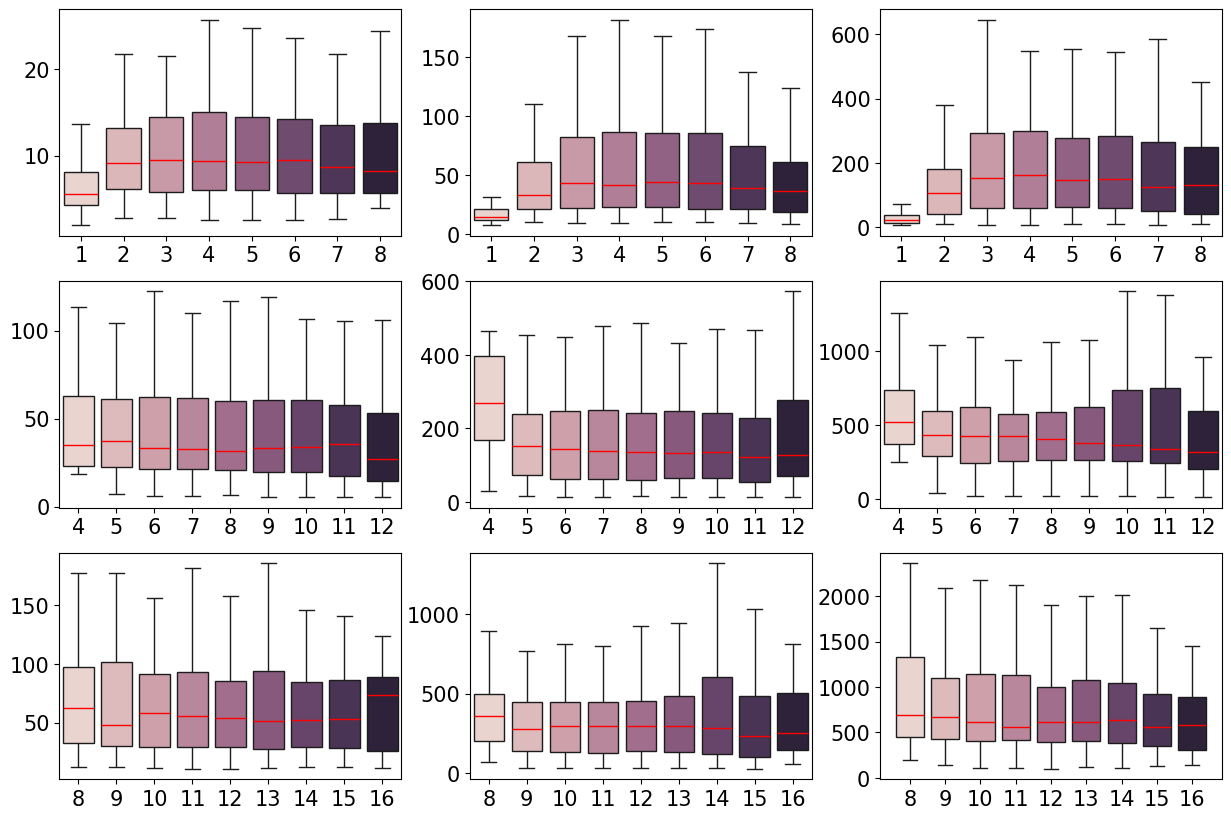

In [52]:
map_types = ["tree", "graph"]
cell_nums = [50, 100, 200]
term_nums = [8, 12, 16]

fig, ax = plt.subplots(3,3, figsize=(15, 10))

for i in range(3):
    for j in range(3):
        term_num = term_nums[i]
        cell_num = cell_nums[j]

        df_plot = val_df[(val_df["type"] == "poly_tree") & (val_df["# cells"] == cell_num) & (val_df["# terminal"] == str(term_num))]
    
        sns.boxplot(x="k", y='time', hue="k", data=df_plot, showfliers = False, ax=ax[i, j], medianprops={'color': 'red'})
        # sns.stripplot(data=df_plot, x="# terminal", y="time", hue="k", alpha=.4, linewidth=1, ax=ax[i, j])
        # ax[i,j].set_title(f"{cell_num}/{term_num}")
        ax[i,j].set_xlabel("")
        ax[i,j].set_ylabel("")
        ax[i,j].get_legend().remove()
        # ax[i,j].legend(title="k")

# fig.legend(handles, labels, loc='upper right')
# plt.xticks(rotation=90)
plt.plot()